# Case study - Wine quality

### Preloading Modules and Functions

In [1]:
# Pandas is for using data structures
import pandas as pd
# numpy is for numerical computing of array and matrix
import numpy as np
# Matplotlib is a plotting package
import matplotlib.pyplot as plt
# matplotlib Showing the plot right after the current code  
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)

In [2]:
# Notice that there is no package in doing best subset/forward selection in Python.
# We developed a module to handle such selection methods. The module file is named as 'model_selection.py'. 
# You should put this file in a folder with name 'model_selection' such that the folder should be added to the same path of this Jupyter Notebook file.
# Then, execute the following to import the module.
from model_selection import model_selection as MS

### Loading data

In [3]:
red_wine = pd.read_csv('wine.csv',sep=",") 
N_red = red_wine.shape
N_red

(1599, 12)

In [4]:
red_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Discriptive statistic
red_wine.iloc[:,0:6].describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000


In [6]:
red_wine.iloc[:,6:12].describe()

,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Split data into training and testing set
#### randomly draw a sample from the dataset to be the training set and the remaining data to be the test set
#### Using 'sample(frac,random_state)' to draw a training set
- Input:
    - frac: the proportion of data to be drawn from a given dataset
    - random_state: the random seed for random split; 
        - If we ignore this input, Python randamly picks a random seed.
        - We may assign a fixed value for the random seed such that the split will be the same for each time when we rerun the code
- Output:
    - a random subset of the given dataset

In [7]:
red_copy = red_wine.copy()
# Training set
train_set = red_copy.sample(frac=0.80, random_state=0)
# Test set
test_set = red_copy.drop(train_set.index)
train_set.shape, test_set.shape

((1279, 12), (320, 12))

# The full model:

In [8]:
import statsmodels.api as sm
model = sm.OLS(train_set['quality'], sm.add_constant(train_set[train_set.columns[0:11]]))
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     60.46
Date:                Wed, 29 Jul 2020   Prob (F-statistic):          5.38e-108
Time:                        10:43:50   Log-Likelihood:                -1273.7
No. Observations:                1279   AIC:                             2571.
Df Residuals:                    1267   BIC:                             2633.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   14.0657 

# Best Subset Selection
#### Getting the variables/features list of the single best model for each criterion
#### Using 'best_subset(X,Y)'
- Input:
    - X: the dataset of the predictors
    - Y: the data of the response variable
- Output:
    - A summary table of the features list of the single best model for each criterion
    - In the meanwhile, plots of criteria vs number of feautres will be shown 

In [9]:
X = train_set.drop(columns = 'quality')
Y = train_set['quality']

In [10]:
#execute: '!pip install tqdm' once before using best_subset() for the first time

,numb_features,SSE,R_squared,Adj_R2,AIC,BIC,C_p,features
10,1,652.807461,0.219922,0.219311,2773.451312,2783.758980,0.511082,"(alcohol,)"
29,2,582.298103,0.304178,0.303087,2629.261981,2644.723482,0.456631,"(volatile_acidity, alcohol)"
146,3,567.086988,0.322355,0.320760,2597.407092,2618.022427,0.445415,"(volatile_acidity, sulphates, alcohol)"
430,4,560.733905,0.329946,0.327842,2584.997570,2610.766739,0.441125,"(volatile_acidity, total_sulfur_dioxide, sulphates, alcohol)"
895,5,556.731185,0.334729,0.332116,2577.834868,2608.757871,0.438673,"(volatile_acidity, total_sulfur_dioxide, pH, sulphates, alcohol)"
1393,6,551.537555,0.340935,0.337827,2567.847339,2603.924175,0.435289,"(volatile_acidity, chlorides, total_sulfur_dioxide, pH, sulphates, alcohol)"
1743,7,549.737204,0.343087,0.339469,2565.665548,2606.896219,0.434559,"(volatile_acidity, citric_acid, chlorides, total_sulfur_dioxide, pH, sulphates, alcohol)"
1959,8,548.843477,0.344155,0.340023,2565.584541,2611.969045,0.434538,"(volatile_acidity, citric_acid, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, pH, sulphates, alcohol)"
2032,9,548.818779,0.344184,0.339533,2567.526984,2619.065322,0.435196,"(volatile_acidity, citric_acid, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol)"
2042,10,548.800019,0.344207,0.339035,2569.483263,2626.175434,0.435858,"(fixed_acidity, volatile_acidity, citric_acid, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol)"


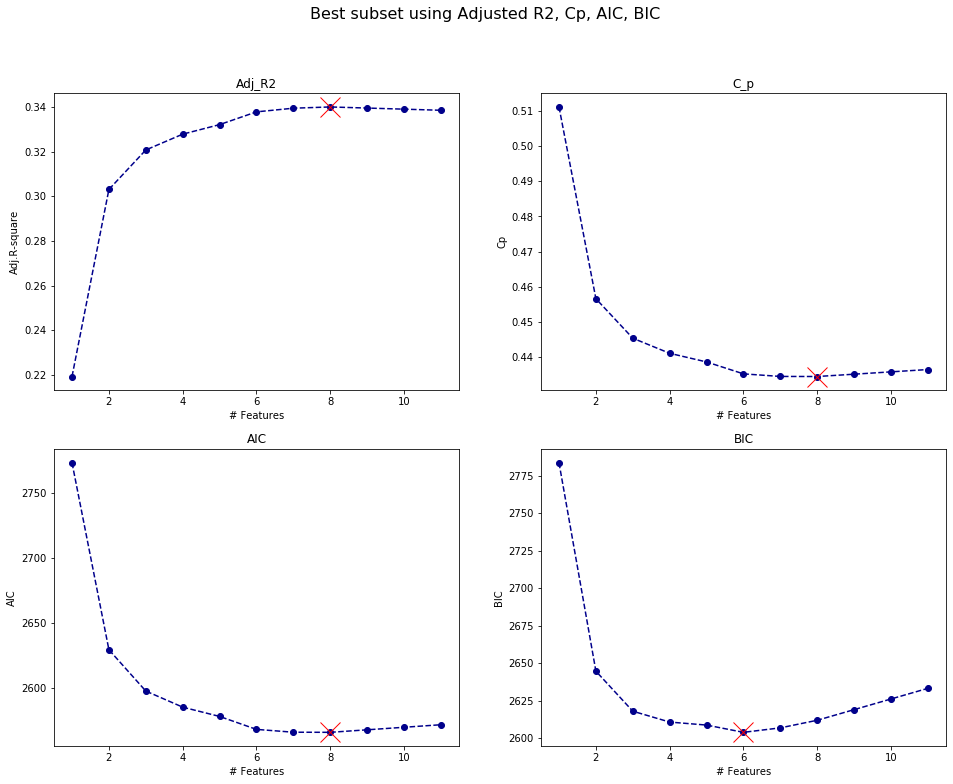

In [11]:
best_result=MS.best_subset(X,Y)

In [12]:
best_result

,Adj_R2,AIC,BIC,C_p
0,volatile_acidity,volatile_acidity,volatile_acidity,volatile_acidity
1,citric_acid,citric_acid,chlorides,citric_acid
2,chlorides,chlorides,total_sulfur_dioxide,chlorides
3,free_sulfur_dioxide,free_sulfur_dioxide,pH,free_sulfur_dioxide
4,total_sulfur_dioxide,total_sulfur_dioxide,sulphates,total_sulfur_dioxide
5,pH,pH,alcohol,pH
6,sulphates,sulphates,NaN,sulphates
7,alcohol,alcohol,NaN,alcohol


### Get the single best model selected by a given criteria, and fit the model

In [13]:
# Example: Adjusted Rsquare
# Take out the variable list of Adjusted Rsquare from 'best_result'
X_feature_Adj_R2=best_result['Adj_R2']
X_feature_Adj_R2

0    volatile_acidity    
1    citric_acid         
2    chlorides           
3    free_sulfur_dioxide 
4    total_sulfur_dioxide
5    pH                  
6    sulphates           
7    alcohol             
Name: Adj_R2, dtype: object

In [14]:
# Example: by Adjusted Rsquare
X_feature_Adj_R2=best_result['Adj_R2']
fit_Adj_R2 = sm.OLS(train_set['quality'], sm.add_constant(train_set[X_feature_Adj_R2])).fit()
print(fit_Adj_R2.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     83.30
Date:                Wed, 29 Jul 2020   Prob (F-statistic):          8.27e-111
Time:                        10:44:07   Log-Likelihood:                -1273.8
No. Observations:                1279   AIC:                             2566.
Df Residuals:                    1270   BIC:                             2612.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.9407 

In [15]:
# Example: BIC
# Take out the variable list of BIC from 'best_result'
# Notice that there are missing values (e.g. NaN) for the column of BIC due to the smaller size than other models
# So we need to apply 'dropna()' to remove the missing values before fitting the regression model
X_feature_BIC=best_result['BIC'].dropna()
X_feature_BIC

0    volatile_acidity    
1    chlorides           
2    total_sulfur_dioxide
3    pH                  
4    sulphates           
5    alcohol             
Name: BIC, dtype: object

In [16]:
#'Example: by BIC
fit_BIC = sm.OLS(train_set['quality'], sm.add_constant(train_set[X_feature_BIC])).fit()
print(fit_BIC.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     109.7
Date:                Wed, 29 Jul 2020   Prob (F-statistic):          1.64e-111
Time:                        10:44:07   Log-Likelihood:                -1276.9
No. Observations:                1279   AIC:                             2568.
Df Residuals:                    1272   BIC:                             2604.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.3911 

# Best subset selection: Use validation set (other kind of criterion) to find the single best model
#### Getting the features list of the single best model by valdiation set approach
#### Using 'best_subset_validation(train_set,Y_name,prop,random_seed)'
- Input:
    - train_set: the training set data 
    - Y_name: the name of the response variable
    - prop: the proportion of the training set to form a training subset
    - random_seed: the random seed in splitting the training subset and the valdiation set
- Output:
    - the features list of the single best model
    - In the meanwhile, a plot of MSE vs number of feautres is shown

,numb_features,MSE_validation,features
10,1,0.520965,"(alcohol,)"
29,2,0.470496,"(volatile_acidity, alcohol)"
146,3,0.464429,"(volatile_acidity, sulphates, alcohol)"
430,4,0.460848,"(volatile_acidity, total_sulfur_dioxide, sulphates, alcohol)"
895,5,0.460152,"(volatile_acidity, total_sulfur_dioxide, pH, sulphates, alcohol)"
1393,6,0.462790,"(volatile_acidity, chlorides, total_sulfur_dioxide, pH, sulphates, alcohol)"
1743,7,0.464455,"(volatile_acidity, citric_acid, chlorides, total_sulfur_dioxide, pH, sulphates, alcohol)"
1959,8,0.464146,"(volatile_acidity, citric_acid, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, pH, sulphates, alcohol)"
2032,9,0.465347,"(volatile_acidity, citric_acid, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol)"
2042,10,0.465480,"(fixed_acidity, volatile_acidity, citric_acid, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol)"


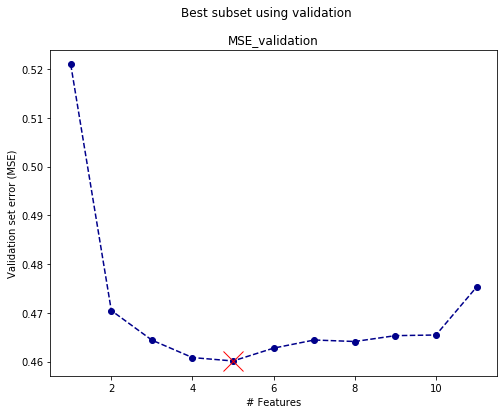

In [17]:
X_feature_validation = MS.best_subset_validation(train_set,'quality',0.7,0)

In [18]:
# The variables of the single best model
X_feature_validation

['volatile_acidity', 'total_sulfur_dioxide', 'pH', 'sulphates', 'alcohol']

In [19]:
# Fitting the single best model
fit_validation = sm.OLS(train_set['quality'], sm.add_constant(train_set[X_feature_validation])).fit()
print(fit_validation.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     128.1
Date:                Wed, 29 Jul 2020   Prob (F-statistic):          5.14e-110
Time:                        10:44:26   Log-Likelihood:                -1282.9
No. Observations:                1279   AIC:                             2578.
Df Residuals:                    1273   BIC:                             2609.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.9678 

# Best subset selection: Use cross validation (other kind of criterion) to find the single best model
#### Getting the features list of the single best model using CV approach
#### Using 'best_subset_CV(train_set,Y_name,K)'; 
- Input:
    - train_set: the training set data 
    - Y_name: the name of the response variable 
    - K: the number of folds of the CV 
- Output:
    - the features list of the single best model
    - In the meanwhile, a plot of MSE vs number of feautres is shown

,numb_features,MSE_CV,features
10,1,0.511319,"(alcohol,)"
29,2,0.458250,"(volatile_acidity, alcohol)"
146,3,0.447555,"(volatile_acidity, sulphates, alcohol)"
430,4,0.442790,"(volatile_acidity, total_sulfur_dioxide, sulphates, alcohol)"
895,5,0.439967,"(volatile_acidity, total_sulfur_dioxide, pH, sulphates, alcohol)"
1393,6,0.436105,"(volatile_acidity, chlorides, total_sulfur_dioxide, pH, sulphates, alcohol)"
1743,7,0.434937,"(volatile_acidity, citric_acid, chlorides, total_sulfur_dioxide, pH, sulphates, alcohol)"
1959,8,0.436298,"(volatile_acidity, citric_acid, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, pH, sulphates, alcohol)"
2032,9,0.437158,"(volatile_acidity, citric_acid, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol)"
2042,10,0.438837,"(fixed_acidity, volatile_acidity, citric_acid, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol)"


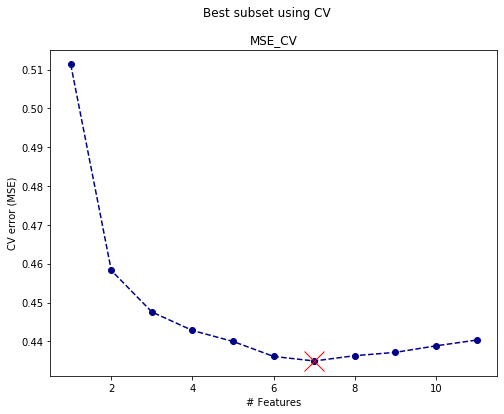

In [20]:
X_feature_CV = MS.best_subset_CV(train_set,'quality',5)

In [21]:
X_feature_CV

['volatile_acidity',
 'citric_acid',
 'chlorides',
 'total_sulfur_dioxide',
 'pH',
 'sulphates',
 'alcohol']

In [22]:
# Fitting the single best model using CV
fit_CV = sm.OLS(train_set['quality'], sm.add_constant(train_set[X_feature_CV])).fit()
print(fit_CV.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     94.83
Date:                Wed, 29 Jul 2020   Prob (F-statistic):          2.28e-111
Time:                        10:44:44   Log-Likelihood:                -1274.8
No. Observations:                1279   AIC:                             2566.
Df Residuals:                    1271   BIC:                             2607.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.9182 

# Forward selection
For computational reasons, the best subset cannot be applied for any large $p$ due to the $2^p$ complexity. Forward Stepwise begins with a model containing no predictors, and then adds predictors to the model, one at the time. At each step, the variable that gives the greatest additional improvement to the fit is added to the model.

## Algorithm
Let $\mathcal{M}_0$ denote the null model which contains no predictors

* Stage 1: For $k = 1,2,...,p-1$
    * Consider all $p - k$ models that augment the predictors in $\mathcal{M_k}$ with one additional predictor
    * Choose the best among these $p - k$ models, and call it $\mathcal{M_{k+1}}$
* Stage 2: Select the single best model among $\mathcal{M_0, M_1,...,M_p}$ using AIC, BIC, adjusted $R^2$ or any other method.

#### Getting the variables/features list of the forward selection for each criterion
#### Using 'forward_selection_(X,Y)'
- Input:
    - X: the dataset of the predictors
    - Y: the data of the response variable
- Output:
    - A summary table contains the variables/features list of the forward selection for each criterion
    - In the meanwhile, plots of criterion vs number of features are shown

In [23]:
X = train_set.drop(columns = 'quality')
Y = train_set['quality']

,features,features added,SSE,R_squared,Adj_R2,AIC,BIC,C_p,numb_features
step 1,[alcohol],alcohol,652.807461,0.219922,0.219311,2773.451312,2783.758980,0.511082,1
step 2,"[alcohol, volatile_acidity]",volatile_acidity,582.298103,0.304178,0.303087,2629.261981,2644.723482,0.456631,2
step 3,"[alcohol, volatile_acidity, sulphates]",sulphates,567.086988,0.322355,0.320760,2597.407092,2618.022427,0.445415,3
step 4,"[alcohol, volatile_acidity, sulphates, total_sulfur_dioxide]",total_sulfur_dioxide,560.733905,0.329946,0.327842,2584.997570,2610.766739,0.441125,4
step 5,"[alcohol, volatile_acidity, sulphates, total_sulfur_dioxide, pH]",pH,556.731185,0.334729,0.332116,2577.834868,2608.757871,0.438673,5
step 6,"[alcohol, volatile_acidity, sulphates, total_sulfur_dioxide, pH, chlorides]",chlorides,551.537555,0.340935,0.337827,2567.847339,2603.924175,0.435289,6
step 7,"[alcohol, volatile_acidity, sulphates, total_sulfur_dioxide, pH, chlorides, citric_acid]",citric_acid,549.737204,0.343087,0.339469,2565.665548,2606.896219,0.434559,7
step 8,"[alcohol, volatile_acidity, sulphates, total_sulfur_dioxide, pH, chlorides, citric_acid, free_sulfur_dioxide]",free_sulfur_dioxide,548.843477,0.344155,0.340023,2565.584541,2611.969045,0.434538,8
step 9,"[alcohol, volatile_acidity, sulphates, total_sulfur_dioxide, pH, chlorides, citric_acid, free_sulfur_dioxide, density]",density,548.818779,0.344184,0.339533,2567.526984,2619.065322,0.435196,9
step 10,"[alcohol, volatile_acidity, sulphates, total_sulfur_dioxide, pH, chlorides, citric_acid, free_sulfur_dioxide, density, fixed_acidity]",fixed_acidity,548.800019,0.344207,0.339035,2569.483263,2626.175434,0.435858,10


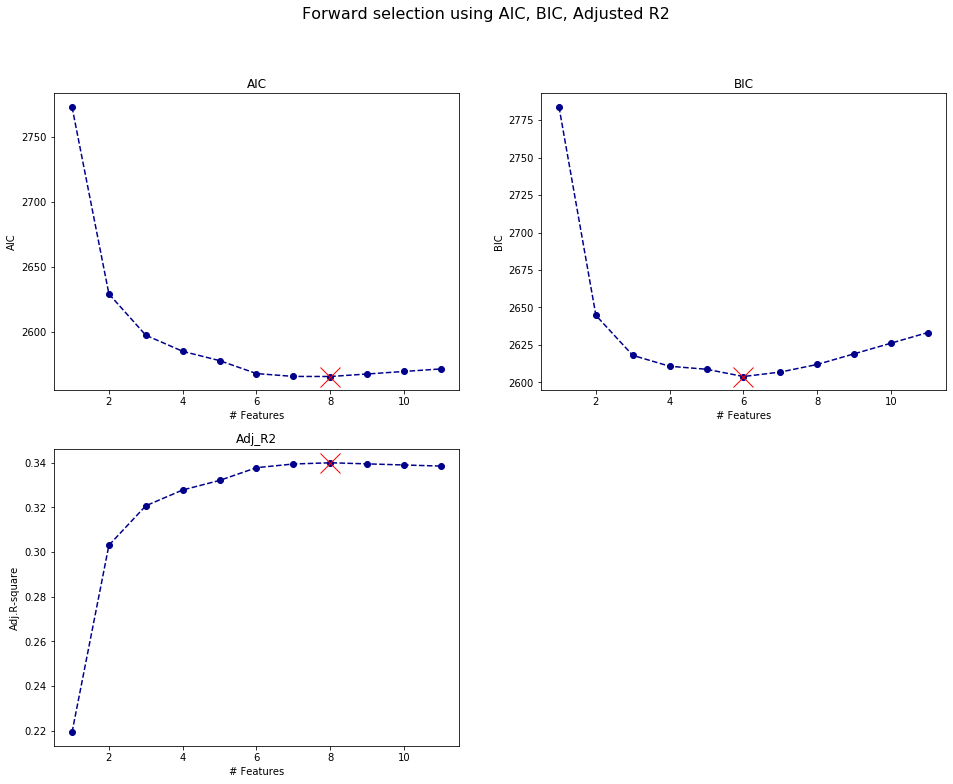

In [24]:
forward_result=MS.forward_selection(X,Y)

In [25]:
forward_result

,Adj_R2,AIC,BIC
0,alcohol,alcohol,alcohol
1,volatile_acidity,volatile_acidity,volatile_acidity
2,sulphates,sulphates,sulphates
3,total_sulfur_dioxide,total_sulfur_dioxide,total_sulfur_dioxide
4,pH,pH,pH
5,chlorides,chlorides,chlorides
6,citric_acid,citric_acid,NaN
7,free_sulfur_dioxide,free_sulfur_dioxide,NaN


### Get the single best model selected by a given criteria, and fit the model

In [26]:
# Getting the variable list uisng AIC as the criterion
X_feature_FD_AIC = forward_result['AIC']
X_feature_FD_AIC

0    alcohol             
1    volatile_acidity    
2    sulphates           
3    total_sulfur_dioxide
4    pH                  
5    chlorides           
6    citric_acid         
7    free_sulfur_dioxide 
Name: AIC, dtype: object

In [27]:
# Fitting the single best model using AIC
fit_FD_AIC = sm.OLS(train_set['quality'], sm.add_constant(train_set[X_feature_FD_AIC])).fit()
print(fit_FD_AIC.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     83.30
Date:                Wed, 29 Jul 2020   Prob (F-statistic):          8.27e-111
Time:                        10:44:45   Log-Likelihood:                -1273.8
No. Observations:                1279   AIC:                             2566.
Df Residuals:                    1270   BIC:                             2612.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.9407 

# Predictive measure by MSE
* Based on the testing set, the MSE of all the methods
* We may use the 'mean_square_error()' function to calculate the MSE using the package from 'sklearn'

In [28]:
from sklearn.metrics import mean_squared_error
mse_best_BIC = mean_squared_error(test_set['quality'], fit_BIC.predict(sm.add_constant(test_set[X_feature_BIC])))
mse_best_adjR2 = mean_squared_error(test_set['quality'], fit_Adj_R2.predict(sm.add_constant(test_set[X_feature_Adj_R2])))
mse_best_validation = mean_squared_error(test_set['quality'], fit_validation.predict(sm.add_constant(test_set[X_feature_validation])))
mse_best_CV = mean_squared_error(test_set['quality'], fit_CV.predict(sm.add_constant(test_set[X_feature_CV])))

print ('MSE.best.subset.BIC:          %.5f'% mse_best_BIC)
print ('MSE.best.subset.adjR2:        %.5f'% mse_best_adjR2)
print ('MSE.best.subset.validation:   %.5f'% mse_best_validation)
print ('MSE.best.subset.CV:           %.5f'% mse_best_CV)

MSE.best.subset.BIC:          0.37264
MSE.best.subset.adjR2:        0.37350
MSE.best.subset.validation:   0.38856
MSE.best.subset.CV:           0.37685


# Final model: Best subset by BIC

In [29]:
# use the full dataset to fit the final model
Y = red_wine['quality']
X = red_wine[X_feature_BIC]
fit_final = sm.OLS(Y,sm.add_constant(X)).fit()
print(fit_final.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     147.4
Date:                Wed, 29 Jul 2020   Prob (F-statistic):          7.12e-149
Time:                        10:44:45   Log-Likelihood:                -1573.4
No. Observations:                1599   AIC:                             3161.
Df Residuals:                    1592   BIC:                             3198.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.2957 

## Final model - VIF
* Multicollinearity causes unreliable coefficient estimates
* One may use VIF to detect multicollinearity
    * The larger the VIF, the stronger the collinearity
* the function below is used to calculate the VIF (taken from topic 1)

In [30]:
# Taken from Topic 1
from statsmodels.stats.outliers_influence import variance_inflation_factor

def getvif(X):
    X = sm.add_constant(X)
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["Predictors"] = X.columns
    return(vif.drop(index = 0).round(2)) 

In [31]:
getvif(X)

,VIF,Predictors
1,1.23,volatile_acidity
2,1.33,chlorides
3,1.05,total_sulfur_dioxide
4,1.22,pH
5,1.32,sulphates
6,1.22,alcohol


# Detecting the few excellent or poor wines (Final model)
## Measure of regression outliers: standardized residuals
#### We may draw a scatter plot of the standardized residuals to detect outliers.
#### Using 'residual_plot_reference(model, cutoff)'
- Input:
    - model: the fitted regression model
    - cutoff: draw two reference lines (y=cutoff, y=-cutoff) to detect outlier, e.g. cutoff=2
- Output:
    - A scatter plot of the standardized residuals with reference lines


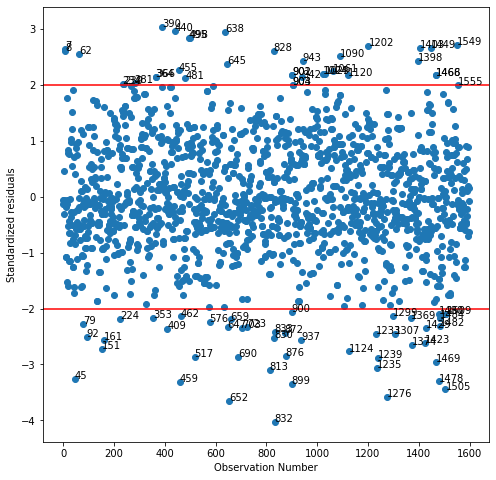

In [32]:
MS.residual_plot_reference(fit_final,2)


In [33]:
#An excellent red wine, i.e. the true price is much higher than what we predict
print(red_wine.iloc[390,:])
print('Predicted quality:' ,fit_final.predict()[390])

fixed_acidity           5.6000 
volatile_acidity        0.8500 
citric_acid             0.0500 
residual_sugar          1.4000 
chlorides               0.0450 
free_sulfur_dioxide     12.0000
total_sulfur_dioxide    88.0000
density                 0.9924 
pH                      3.5600 
sulphates               0.8200 
alcohol                 12.9000
quality                 8.0000 
Name: 390, dtype: float64
Predicted quality: 6.043574379395032


In [34]:
#A poor red wine, i.e. the true price is much lower than what we predict
print(red_wine.iloc[832,:])
print('Predicted quality:', fit_final.predict()[832])

fixed_acidity           10.40000
volatile_acidity        0.44000 
citric_acid             0.42000 
residual_sugar          1.50000 
chlorides               0.14500 
free_sulfur_dioxide     34.00000
total_sulfur_dioxide    48.00000
density                 0.99832 
pH                      3.38000 
sulphates               0.86000 
alcohol                 9.90000 
quality                 3.00000 
Name: 832, dtype: float64
Predicted quality: 5.605749639152263


In [ ]:
# Exercise:
# Create a indicator variable 'dummy' such that 'dummy' = 1 if pH >= 7  else 0.
train_set_ex = train_set.copy()
train_set_ex['dummy'] = 



In [ ]:
# Exercise:
# Apply log-transform on 'total_sulfur_dioxide'
train_set_ex['log(total_sulfur_dioxide)'] = 



In [ ]:
# Exercise:
# Apply best subset selection on the below X and Y
# Store the result in best_result_ex
X_ex = train_set_ex.drop(columns = ["quality", "pH", "total_sulfur_dioxide"])
Y_ex = train_set_ex['quality']

best_result_ex = 
best_result_ex

In [ ]:
# Exercise:
# Find the subset that has the highest adjusted R^2
# Fit a model with the subset
X_ex_feature_adj = 
model_fit_adj = 

model_fit_adj.summary()

In [ ]:
# Exercise:
# Apply forward selection on the below X and Y
# Store the result in forward_result_ex
forward_result_ex = 
forward_result_ex

In [ ]:
# Exercise:
# Find the MSE of 'model_fit_adj' in the training data

